# "Первые шаги"

In [2]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt

In [7]:
path = 'C:\\Users\\gorba\\DataSciense\\DataScience\\SkillFactory\\data\\'
data = pd.read_csv(path + 'srt_data.csv', sep =',')
df = data.copy()

In [8]:
df.shape

(4824, 6)

In [9]:
print(f'df.ts.min() = {df.ts.min()}')
print(f'df.ts.max() = {df.ts.max()}')

df.ts.min() = 2018-10-01
df.ts.max() = 2019-04-30


In [10]:
df.isna().sum()

ts                         0
serialNo                   0
home                       0
batteryVoltageMilliV       3
insideTemperatureCentiC    2
humidityMilliPerc          0
dtype: int64

In [11]:
df.home.nunique()

8

In [12]:
df.home.unique()

array([165132, 174376,  29473, 234419, 193000, 213528, 251841, 300551],
      dtype=int64)

In [13]:
df.serialNo.nunique()

25

<AxesSubplot:xlabel='ts'>

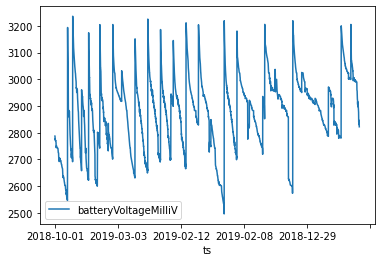

In [14]:
df.plot('ts', 'batteryVoltageMilliV')

In [15]:
df[df.batteryVoltageMilliV.isna()].head()

,ts,serialNo,home,batteryVoltageMilliV,insideTemperatureCentiC,humidityMilliPerc
10,2018-10-11,VA4202760704,165132,NaN,2135.1000,657.02356
11,2018-10-12,VA4202760704,165132,NaN,2138.1677,676.12256
12,2018-10-13,VA4202760704,165132,NaN,2080.6738,653.83685


In [16]:
df[df.insideTemperatureCentiC.isna()].head()

,ts,serialNo,home,batteryVoltageMilliV,insideTemperatureCentiC,humidityMilliPerc
23,2018-10-24,VA4202760704,165132,2750.4220,NaN,605.1256
24,2018-10-25,VA4202760704,165132,2750.6438,NaN,617.4750


Выберите данные с датчика с серийным номером VA2170620672.

Укажите максимальное значение напряжения на батарее (batteryVoltageMilliV).

In [19]:
df[df.serialNo == 'VA2170620672'].batteryVoltageMilliV.max()

3219.567

Для того же датчика укажите значение напряжения на батарее, соответствующее 75% квантиля распределения.

In [20]:
df[df.serialNo == 'VA2170620672'].batteryVoltageMilliV.quantile(0.75)

2951.2801

In [26]:
df['ts']

0      2018-10-01
1      2018-10-02
2      2018-10-03
3      2018-10-04
4      2018-10-05
          ...    
4819   2018-11-04
4820   2018-11-05
4821   2018-11-06
4822   2018-11-07
4823   2018-11-08
Name: ts, Length: 4824, dtype: datetime64[ns]

Для того же датчика выберите данные за ноябрь 2018 г. и укажите медианное значение на влажности (humidityMilliPerc).

In [32]:
df['ts'] = pd.to_datetime(df['ts'])  
df[(df.serialNo == 'VA2170620672') & 
   ((df['ts'] > '2018.11.1') & (df['ts'] <= '2018.11.30'))].humidityMilliPerc.median()

567.8942

Выберите данные с датчика с серийным номером VA2048854528.

Постройте график напряжения на батарее (batteryVoltageMilliV).

Укажите, сколько раз батарея была заменена (количество пиков со значением выше 3200 mV).

<AxesSubplot:xlabel='ts'>

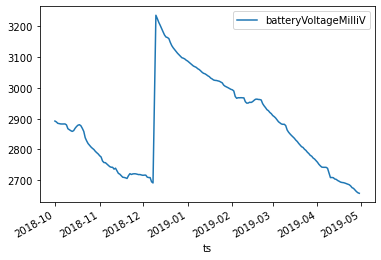

In [35]:
df[(df.serialNo == 'VA2048854528')].plot('ts', 'batteryVoltageMilliV')

Укажите, сколько значений температуры (среди всех данных) лежат строго ниже  1200 сС ( 12 градусов Цельсия).

In [65]:
len(df[df.insideTemperatureCentiC < 1200])

92

<AxesSubplot:xlabel='ts'>

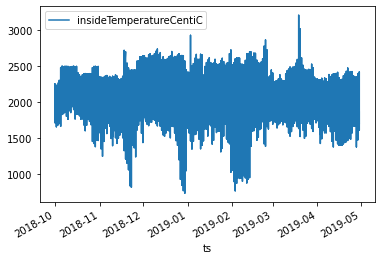

In [40]:
df.plot('ts', 'insideTemperatureCentiC')

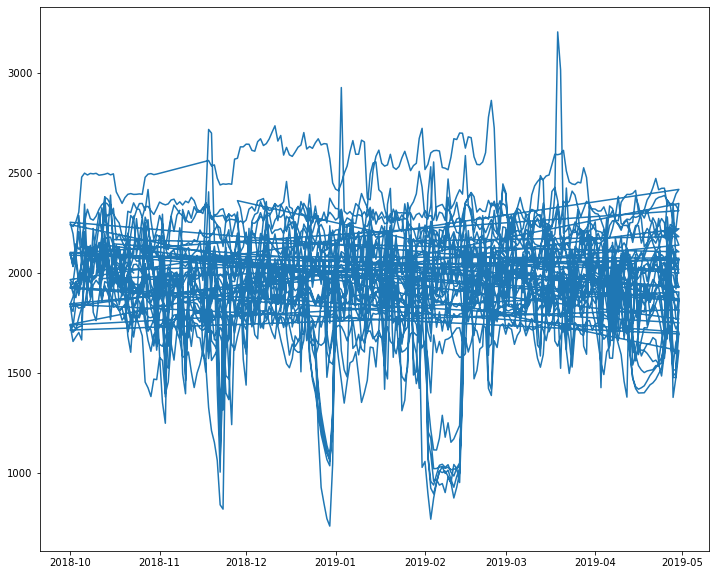

In [54]:
f = plt.figure(figsize=(12, 10))
plt.plot(df.ts, df.insideTemperatureCentiC)

<AxesSubplot:xlabel='ts', ylabel='insideTemperatureCentiC'>

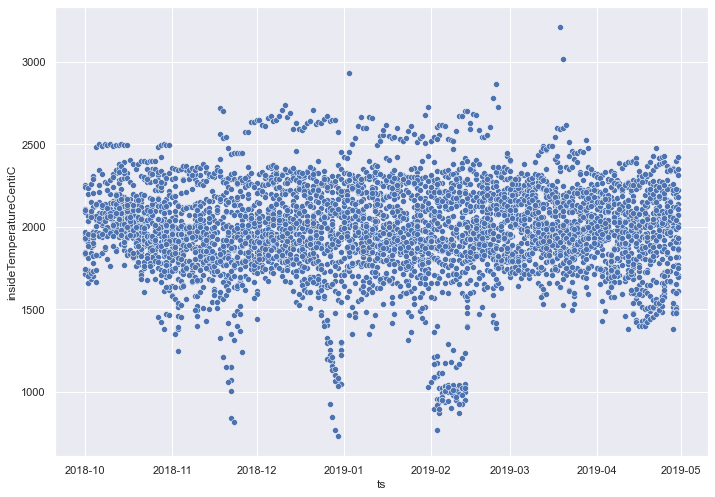

In [58]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(data=df, x="ts", y="insideTemperatureCentiC")

Укажите, сколько значений температуры (среди всех данных) лежат нестрого выше %-квантиля, вычисленного по всем датчикам

In [ ]:
df[df.serialNo == 'VA2170620672'].batteryVoltageMilliV.quantile(0.75)

In [69]:
len(df[df['insideTemperatureCentiC'] >= df['insideTemperatureCentiC'].quantile(0.75)].insideTemperatureCentiC)

1206